Dublin Bikes Analysis

In [3]:
#import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate

In [4]:
#load data
df= pd.read_csv("/Users/shalineraghupathy/Documents/SE Data/mergeddata.csv")

Data checks

In [5]:
df.shape

(1717981, 38)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717981 entries, 0 to 1717980
Data columns (total 38 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   available_bikes        int64  
 1   available_bike_stands  float64
 2   last_update            object 
 3   status                 object 
 4   weather_main           object 
 5   weather_description    object 
 6   weather_id             int64  
 7   weather_icon           object 
 8   position_lat           float64
 9   position_long          float64
 10  temperature            float64
 11  feels_like             float64
 12  temp_min               float64
 13  temp_max               float64
 14  pressure               int64  
 15  humidity               int64  
 16  visibility             int64  
 17  wind_speed             float64
 18  wind_deg               int64  
 19  clouds_all             int64  
 20  sys_type               int64  
 21  sys_id                 int64  
 22  sys_country       

Get unique value counts of all features for a breif understanding

In [7]:
#unique counts of all features
unique_counts = pd.DataFrame.from_records([(col,df[col].nunique()) for col in df.columns],columns=['Column_name','Num_unique']).sort_values(by=['Num_unique'])

In [8]:
unique_counts

,Column_name,Num_unique
9,position_long,1
22,sys_country,1
33,contract_name,1
3,status,1
26,id_y,1
27,name,1
28,cod,1
8,position_lat,1
32,bonus,1
20,sys_type,2


Inferences
 - Many columns are constant and don't add value 
 - We can remove the columns that doesn't add much value
 - Some seems to be duplicate of another

In [9]:
df.columns

Index(['available_bikes', 'available_bike_stands', 'last_update', 'status',
       'weather_main', 'weather_description', 'weather_id', 'weather_icon',
       'position_lat', 'position_long', 'temperature', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'visibility',
       'wind_speed', 'wind_deg', 'clouds_all', 'sys_type', 'sys_id',
       'sys_country', 'sys_sunrise', 'sys_sunset', 'timezone', 'id_y', 'name',
       'cod', 'address', 'banking', 'bike_stands', 'bonus', 'contract_name',
       'name_station', 'number', 'position_lat_station',
       'position_long_station'],
      dtype='object')

Keep only the required features
- Analysis is depending more on the weather at that particular time
- Analysis doesn't require the latitude and longitude of station since we don't have more data on the population at that particular location
- Most of the weather features correspond to weather_main feature,others can be removed
- More details on wind feature isn't necessary for analysis
- Rain could be a good feature
- Visibility, humidity can also play a part

In [10]:
#Keep only the required columns
df = df[['available_bikes', 'available_bike_stands', 'last_update',
       'weather_main','temperature', 'feels_like','banking',
       'humidity', 'visibility',
       'number']]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717981 entries, 0 to 1717980
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   available_bikes        int64  
 1   available_bike_stands  float64
 2   last_update            object 
 3   weather_main           object 
 4   temperature            float64
 5   feels_like             float64
 6   banking                int64  
 7   humidity               int64  
 8   visibility             int64  
 9   number                 int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 131.1+ MB


Data type transformations

In [12]:
df['last_update']=df['last_update'].astype('datetime64[ms]')

In [13]:
df['weather_main']= df['weather_main'].astype('category')

Visualize nulls

<Axes: >

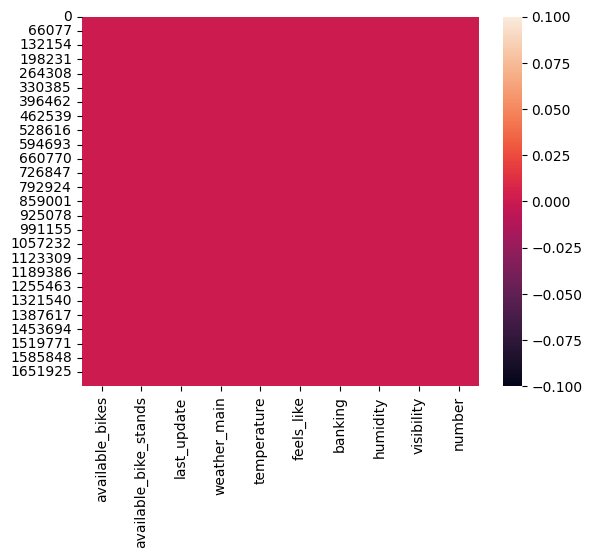

In [14]:
sns.heatmap(df.isnull())

No nulls found

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df['Day'] = df['last_update'].dt.day_of_week

In [17]:
df['Hour_of_day']=df['last_update'].dt.hour

In [18]:
df= pd.concat([df,pd.get_dummies(df['weather_main'],dtype='int')],axis=1)

In [19]:
df.drop(['last_update','weather_main'],axis=1,inplace=True)

In [20]:
df.head()

,available_bikes,available_bike_stands,temperature,feels_like,banking,humidity,visibility,number,Day,Hour_of_day,Clear,Clouds,Drizzle,Fog,Mist,Rain,Snow
0,0,40.0,279.58,277.69,0,77,10000,36,6,5,0,1,0,0,0,0,0
1,0,40.0,279.58,277.69,0,77,10000,36,6,5,0,1,0,0,0,0,0
3,3,37.0,279.58,277.69,0,77,10000,36,6,22,0,1,0,0,0,0,0
5,3,37.0,279.58,277.69,0,77,10000,36,6,22,0,1,0,0,0,0,0
7,3,37.0,279.58,277.69,0,77,10000,36,6,22,0,1,0,0,0,0,0


Data transformations are complete. We can proceed with visualizations to understand more patterns

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1057318 entries, 0 to 1717980
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   available_bikes        1057318 non-null  int64  
 1   available_bike_stands  1057318 non-null  float64
 2   temperature            1057318 non-null  float64
 3   feels_like             1057318 non-null  float64
 4   banking                1057318 non-null  int64  
 5   humidity               1057318 non-null  int64  
 6   visibility             1057318 non-null  int64  
 7   number                 1057318 non-null  int64  
 8   Day                    1057318 non-null  int32  
 9   Hour_of_day            1057318 non-null  int32  
 10  Clear                  1057318 non-null  int32  
 11  Clouds                 1057318 non-null  int32  
 12  Drizzle                1057318 non-null  int32  
 13  Fog                    1057318 non-null  int32  
 14  Mist                   

Statistical analysis with Pearson correlation coefficients

In [22]:
pearson_coeff =df.corr(method='pearson')

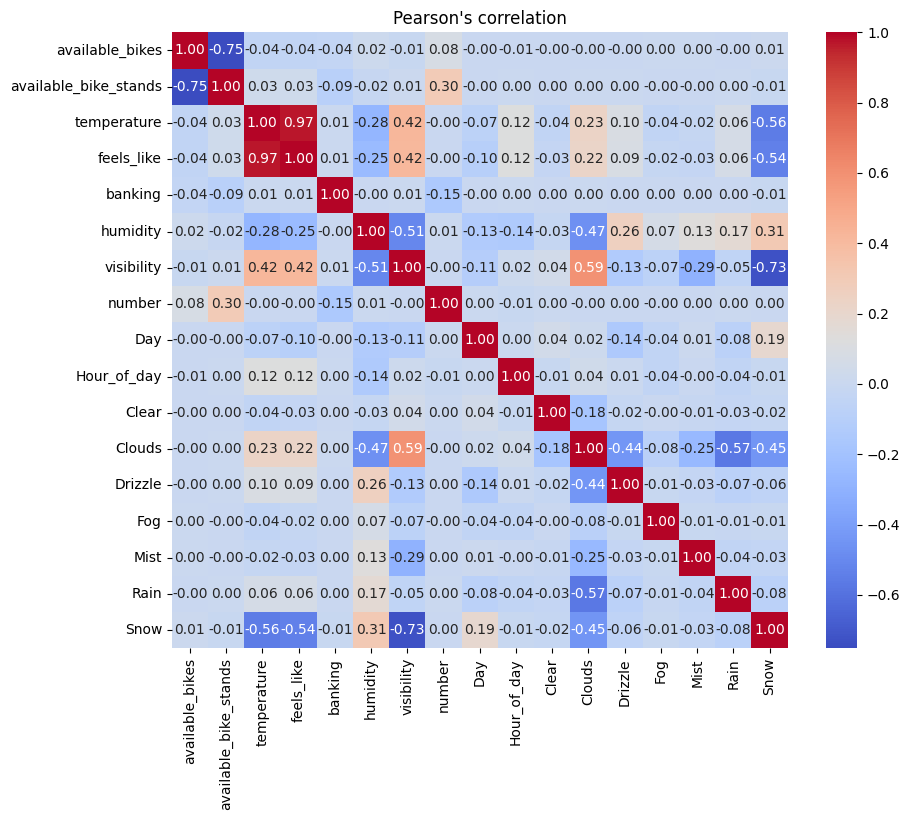

In [23]:
#fif,axes = plt.subplots(1,2)
plt.figure(figsize=(10,8))
sns.heatmap(pearson_coeff,annot=True,cmap='coolwarm',fmt=".2f",square=True)
plt.title("Pearson's correlation")
plt.show();

The value ranges from -1 to 1. -1 represent negative correalation and 0 represent no correlation and 1 represent positive correlation

When applied on the whole data, Correlation is not that evident. Lets focus on a particular station

In [24]:
#Station 1 data
df_1=df[df['number']==1]

In [25]:
pearson_coeff =df_1.corr(method='pearson')

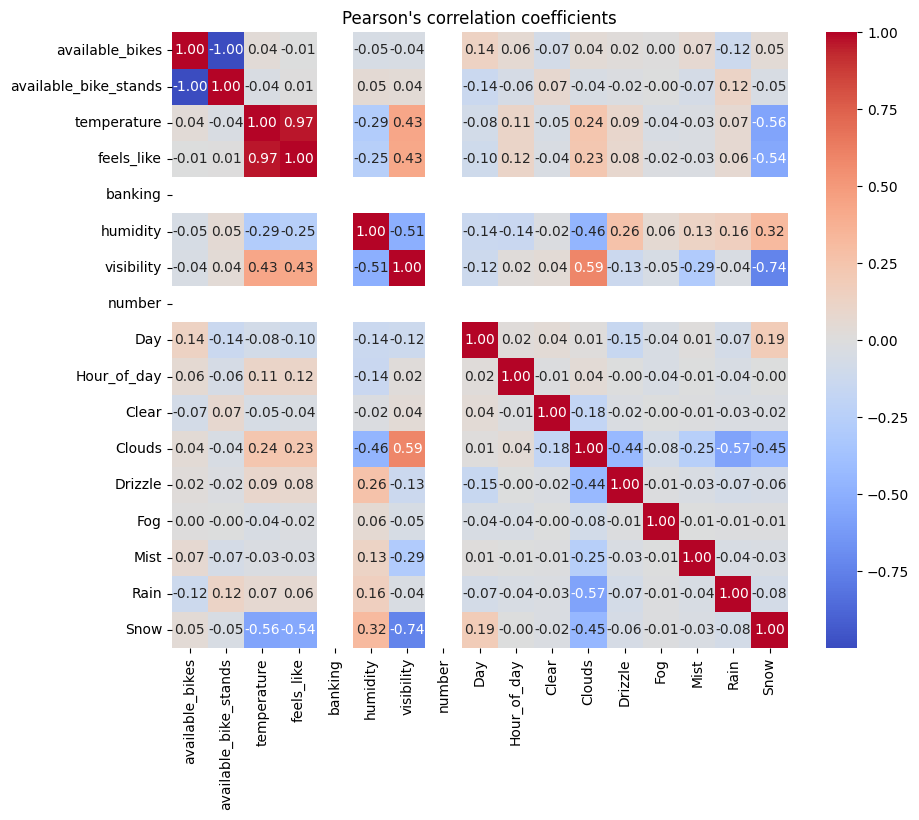

In [26]:
#fif,axes = plt.subplots(1,2)
plt.figure(figsize=(10,8))
sns.heatmap(pearson_coeff,annot=True,cmap='coolwarm',fmt=".2f",square=True)
plt.title("Pearson's correlation coefficients")
plt.show();

Correlation coefficienta are increased a bit 
- Day, Hour of day has a postive correlation
- It is worth to note that Rain has a negative correlation

Lets apply the same for the next station fpor comparison

In [27]:
df_2 = df[df['number']==2]

In [28]:
pearson_coeff =df_2.corr(method='pearson')

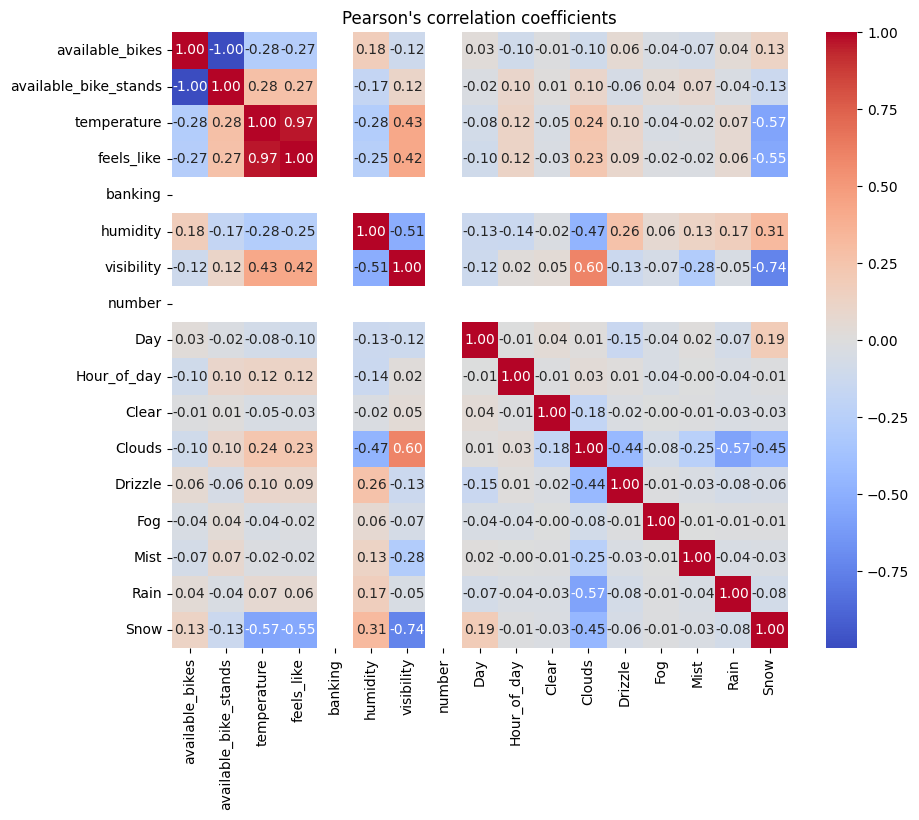

In [29]:
#fif,axes = plt.subplots(1,2)
plt.figure(figsize=(10,8))
sns.heatmap(pearson_coeff,annot=True,cmap='coolwarm',fmt=".2f",square=True)
plt.title("Pearson's correlation coefficients")
plt.show();

It is evident that analysis differ from stataion to station
- we will further confirm this with other correlation of specific variables for both of these stations

Station 1

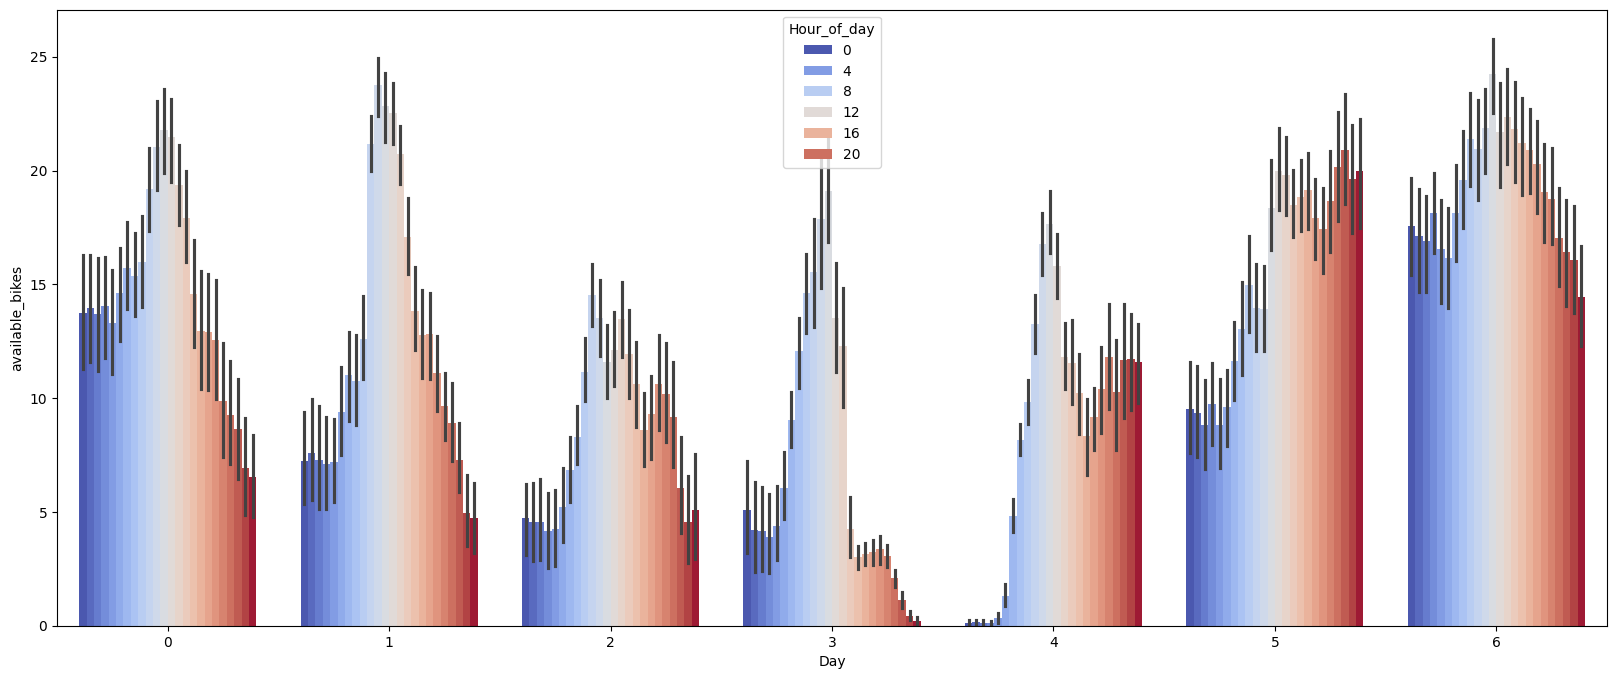

In [30]:
plt.figure(figsize=(20,8))
sns.barplot(df_1,x='Day',y='available_bikes',hue='Hour_of_day',palette='coolwarm');

For this station, surprisingly we could see the bikes are available during peak hours

Now lets observe the same for station 2

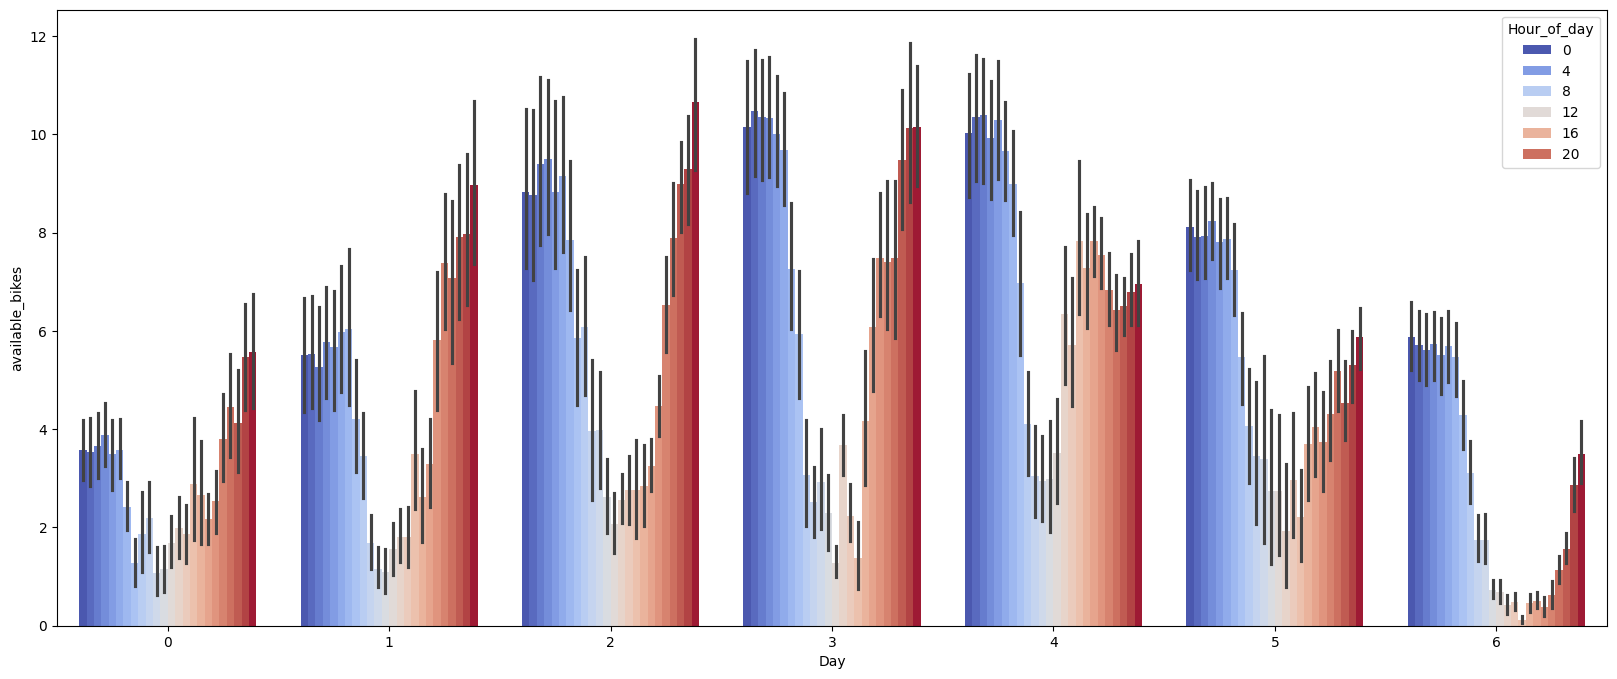

In [31]:
plt.figure(figsize=(20,8))
sns.barplot(df_2,x='Day',y='available_bikes',hue='Hour_of_day',palette='coolwarm');

Here it is evident that the bikes aren't available during peak hours and are being used. This makes sense
- other possibility would be the timezone of these stations and other factors which is not concentrated in this analysis
- Lets dig this further for station 2 which is nominal in our analysis

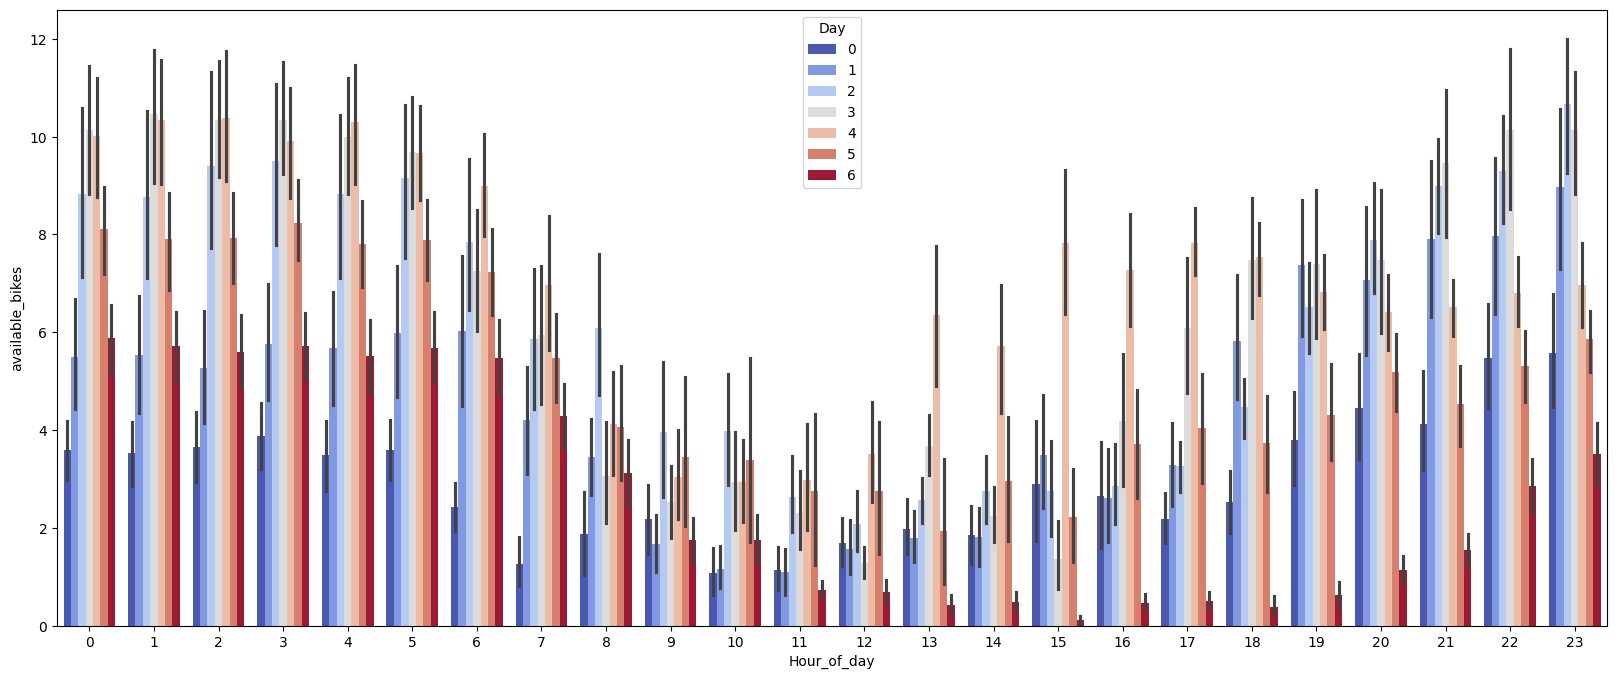

In [32]:
plt.figure(figsize=(20,8))
sns.barplot(df_2,x='Hour_of_day',y='available_bikes',hue='Day',palette='coolwarm');

Here it is evident that on the weekends ( day 5 & 6 ), there are less bikes available throughout the day when compared to other days

<Figure size 1000x800 with 0 Axes>

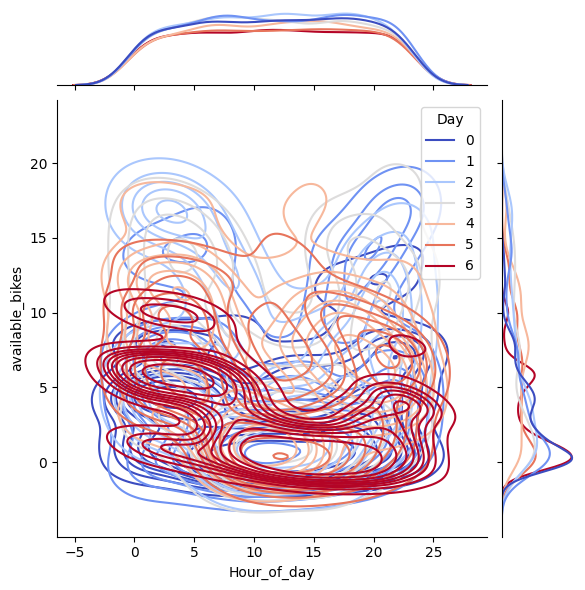

In [33]:
plt.figure(figsize=(10,8))
sns.jointplot(df_2,x='Hour_of_day',y='available_bikes',kind='kde',hue='Day',palette='coolwarm');

Here we can see the density of weekend 'red' lines being low all through the day

We can examine other features like rain, temp

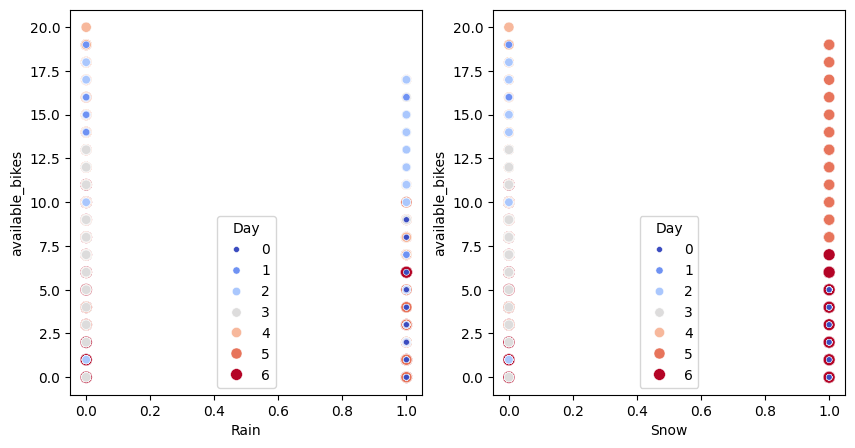

In [34]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(df_2,x='Rain',y='available_bikes',hue='Day',size='Day',legend='full',palette='coolwarm',ax=axes[0]);
sns.scatterplot(df_2,x='Snow',y='available_bikes',hue='Day',size='Day',legend='full',palette='coolwarm',ax=axes[1]);

It is quite understandable that when we have bikes available when there is a rain or snow on weekends and also we can notice no bikes available when there is no rain on weekends

- For other days it is seen that the bikes are available even when there is no rain.

<Figure size 1000x800 with 0 Axes>

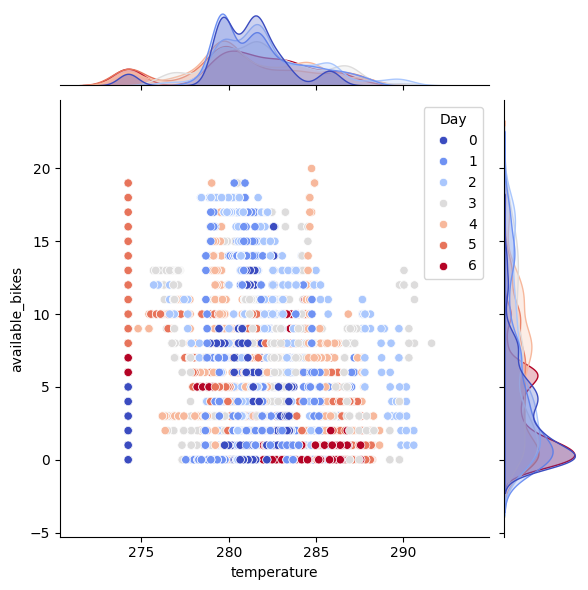

In [35]:
plt.figure(figsize=(10,8))
sns.jointplot(df_2,x='temperature',y='available_bikes',kind='scatter',hue='Day',palette='coolwarm');

Blue lines represent that the bikes aren't used much during peak time when there is more heat during weekdays

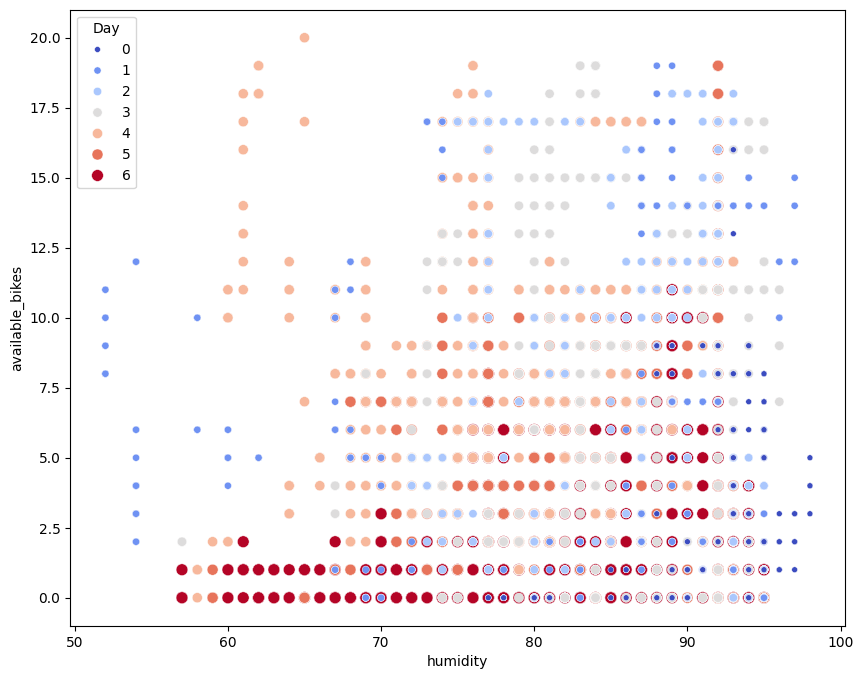

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot(df_2,x='humidity',y='available_bikes',hue='Day',size='Day',legend='full',palette='coolwarm');

In [37]:
df_2

,available_bikes,available_bike_stands,temperature,feels_like,banking,humidity,visibility,number,Day,Hour_of_day,Clear,Clouds,Drizzle,Fog,Mist,Rain,Snow
406890,7,13.0,279.58,277.69,0,77,10000,2,6,5,0,1,0,0,0,0,0
406891,7,13.0,279.58,277.69,0,77,10000,2,6,5,0,1,0,0,0,0,0
406893,4,16.0,279.58,277.69,0,77,10000,2,6,22,0,1,0,0,0,0,0
406894,3,17.0,279.58,277.69,0,77,10000,2,6,22,0,1,0,0,0,0,0
406895,4,16.0,279.58,277.69,0,77,10000,2,6,22,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421951,7,13.0,290.31,289.99,0,73,10000,2,3,11,0,1,0,0,0,0,0
421952,7,13.0,290.31,289.99,0,73,10000,2,3,11,0,1,0,0,0,0,0
421954,8,12.0,290.31,289.99,0,73,10000,2,3,11,0,1,0,0,0,0,0
421956,9,11.0,290.31,289.99,0,73,10000,2,3,11,0,1,0,0,0,0,0


Lets bulild a regression analysis and test the predictions

Use stratified sample of dataset in order to equally have samples for all the days (Class rebalancing)

In [38]:
df_train,df_test = train_test_split(df_2, stratify=df_2['Day'], test_size=0.20)

In [39]:
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)

In [57]:
df_train.iloc[:,2:].drop(['number','available_bike_stands'],axis=1)

,temperature,feels_like,banking,humidity,visibility,Day,Hour_of_day,Clear,Clouds,Drizzle,Fog,Mist,Rain,Snow
0,281.40,279.21,0,91,10000,3,2,0,1,0,0,0,0,0
1,279.58,277.69,0,77,10000,1,4,0,1,0,0,0,0,0
2,282.97,281.71,0,96,6000,0,12,0,0,0,0,0,1,0
3,281.19,278.03,0,92,10000,6,5,0,0,0,0,0,1,0
4,280.56,277.66,0,94,7000,6,22,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,281.48,278.21,0,91,10000,1,18,0,1,0,0,0,0,0
6997,281.83,279.24,0,94,8000,0,2,0,0,1,0,0,0,0
6998,279.58,277.69,0,77,10000,1,19,0,1,0,0,0,0,0
6999,283.53,282.58,0,75,10000,5,21,0,1,0,0,0,0,0


Train the model with the features except available bike stands

In [58]:
#input values
x = df_train.iloc[:,2:].drop(['number','available_bike_stands'],axis=1)
#target values
y =df_train.available_bikes

#use polynomial of degree 2
polynomial_features = PolynomialFeatures(degree=2)

#fit input value into polynomial
x_poly = polynomial_features.fit_transform(x)

#use linear regression model
model = LinearRegression()

#train model 
model.fit(x_poly, y)

LinearRegression()

In [59]:
#predict using same input
y_poly_pred_test_data = model.predict(x_poly)

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y, pd.DataFrame(y_poly_pred_test_data, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg)


Predictions with multiple linear regression: 

      available_bikes  Predicted
0                  11   9.846737
1                   4   5.786705
2                   2   0.942403
3                   6   3.966179
4                   4   2.856951
...               ...        ...
6996               15   6.284280
6997                2   5.345966
6998               14   6.060990
6999                0   4.440010
7000               12   9.542749

[7001 rows x 2 columns]


In [60]:
#This function is used repeatedly to compute all metrics
def printMetrics(testActualVal, predictions):
    #classification evaluation measures
    print('Error Evaluation')
    print('==============================================================================')
    print("MAE (Mean Absolute Error): ", metrics.mean_absolute_error(testActualVal, predictions))
    print("MSE (Mean Squared Error): ", metrics.mean_squared_error(testActualVal, predictions))
    print("RMSE (Root Mean Squared Error): ", metrics.mean_squared_error(testActualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(testActualVal, predictions))

In [61]:
printMetrics(y, y_poly_pred_test_data)

Error Evaluation
MAE (Mean Absolute Error):  2.9290912014518202
MSE (Mean Squared Error):  14.158108461083094
RMSE (Root Mean Squared Error):  3.762726200653337
R2:  0.39065209770415665


Test the predictions

In [63]:
#selecting multiple features
#features = ["weekday","hour","weatherMain","temperature"]

#input values
x = df_test.iloc[:,2:].drop(['number','available_bike_stands'],axis=1)
#target values
y = df_test.available_bikes

#fit input value into polynomial
x_poly = polynomial_features.fit_transform(x)

#predict using new input
y_poly_pred_new_data = model.predict(x_poly)

In [64]:
printMetrics(y, y_poly_pred_new_data)

Error Evaluation
MAE (Mean Absolute Error):  2.903597051032722
MSE (Mean Squared Error):  13.811195011572297
RMSE (Root Mean Squared Error):  3.716341616640254
R2:  0.3817970862046719


Inclue available_bike_stands

In [65]:
#input values
x = df_train.iloc[:,2:].drop(['number'],axis=1)
#target values
y =df_train.available_bikes

#use polynomial of degree 2
polynomial_features = PolynomialFeatures(degree=2)

#fit input value into polynomial
x_poly = polynomial_features.fit_transform(x)

#use linear regression model
model = LinearRegression()

#train model 
model.fit(x_poly, y)

LinearRegression()

In [66]:
#predict using same input
y_poly_pred_test_data = model.predict(x_poly)

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y, pd.DataFrame(y_poly_pred_test_data, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg)


Predictions with multiple linear regression: 

      available_bikes  Predicted
0                  11  10.997041
1                   4   3.967807
2                   2   1.971930
3                   6   5.964985
4                   4   4.020183
...               ...        ...
6996               15  15.002729
6997                2   1.983377
6998               14  13.932147
6999                0   0.012098
7000               12  12.000827

[7001 rows x 2 columns]


In [67]:
printMetrics(y, y_poly_pred_test_data)

Error Evaluation
MAE (Mean Absolute Error):  0.025316486862100203
MSE (Mean Squared Error):  0.00770207873905804
RMSE (Root Mean Squared Error):  0.08776148778967936
R2:  0.9996685118258655


In [69]:
#input values
x = df_test.iloc[:,2:].drop(['number'],axis=1)
#target values
y = df_test.available_bikes

#fit input value into polynomial
x_poly = polynomial_features.fit_transform(x)

#predict using new input
y_poly_pred_new_data = model.predict(x_poly)

In [70]:
printMetrics(y, y_poly_pred_new_data)

Error Evaluation
MAE (Mean Absolute Error):  0.025149479967303233
MSE (Mean Squared Error):  0.007619491371439336
RMSE (Root Mean Squared Error):  0.08728969796854229
R2:  0.9996589439390643


The error rate has drastically reduced since available bike stands is negatively correlated to available bikes and has a linear fit

- practically while testing a new dataset, available bike stands can't be given as a input feature. this can also lead to overfitting
- we can proceed with the first approach 